In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fm_dataset = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fm_dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print("training set shape: ", train_images.shape)
print("training set labels shape: ", train_labels.shape)

print("test set shape: ", test_images.shape)
print("test set labels shape: ", test_labels.shape)

print(" a sample training image label " , train_labels[0])


training set shape:  (60000, 28, 28)
training set labels shape:  (60000,)
test set shape:  (10000, 28, 28)
test set labels shape:  (10000,)
 a sample training image label  9


In [5]:
# Define text labels for Fashion MNIST categories
fashion_mnist_labels = ["T-shirt/top", # Label 0
                        "Trouser", # Label 1
                        "Pullover", # Label 2
                        "Dress", # Label 3
                        "Coat", # Label 4
                        "Sandal", # Label 5
                        "Shirt", # Label 6
                        "Sneaker", # Label 7
                        "Bag",# Label 8
                        "Ankle boot"] # Label 9


y = 3 Dress


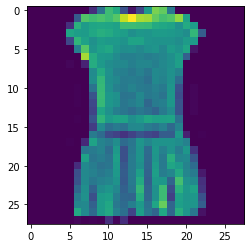

In [6]:
## Visualize some images from 60,000 images by randomly picking up an image from training set
## We can pick up any number between 0 and 59,999
i = 3 # i can be between 0 to 59,999
# 'train_labels' contain the labels ranging from 0 to 9
label = train_labels[i]
#Print the label, for example 2 pullover
print("y = " + str(label) + " " + (fashion_mnist_labels[label]))
# Show the image for that label
plt.imshow(train_images[i])

In [7]:
# Step 1 : Defining our ANN
# Total Params = 2,35,500 + 30,100 + 1010 = 2,66,610
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu')) #2,35,500 params
model.add(keras.layers.Dense(100, activation='relu')) # 30,100 params
model.add(keras.layers.Dense(10, activation='softmax')) # 1010 params

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.utils import plot_model

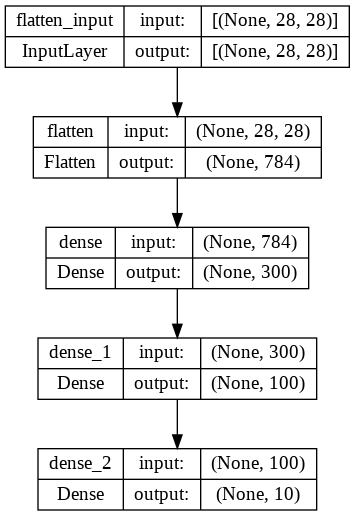

In [10]:
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

In [11]:
# Step 2: Compiling the defined Neural Network Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
# Step 3: Training the Compiled NN Model Using Back-Propagation Method
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 2.0188 - accuracy: 0.7101
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6187 - accuracy: 0.7915
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5217 - accuracy: 0.8192
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4741 - accuracy: 0.8332
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4395 - accuracy: 0.8460
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4077 - accuracy: 0.8563
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3881 - accuracy: 0.8633
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3799 - accuracy: 0.8673
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3703 - accuracy: 0.8697
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [13]:
# Step 4 : Evaluating the trained model on Test Data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the test accuracy
print('\n', 'Test Accuracy: ', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.8507

 Test Accuracy:  0.8507000207901001


In [14]:
result = np.random.choice(test_images.shape[0], size = 15, replace=False)
y_predicted = model.predict(test_images)
fashion_mnist_labels[np.argmax(y_predicted[2300])]

313/313 [==============================] - 1s 2ms/step


'Shirt'

# Visualize the prediction
Now let us visualize the prediction using the model we just trained above. First we will get the predictions with the model from the test data. Then we print 15 sample random images from the test dataset, and set the titles with the prediction and the ground-truth label. If the prediction matches the true label, the title will be green; otherwise the title will be displayed in red.

313/313 [==============================] - 1s 3ms/step


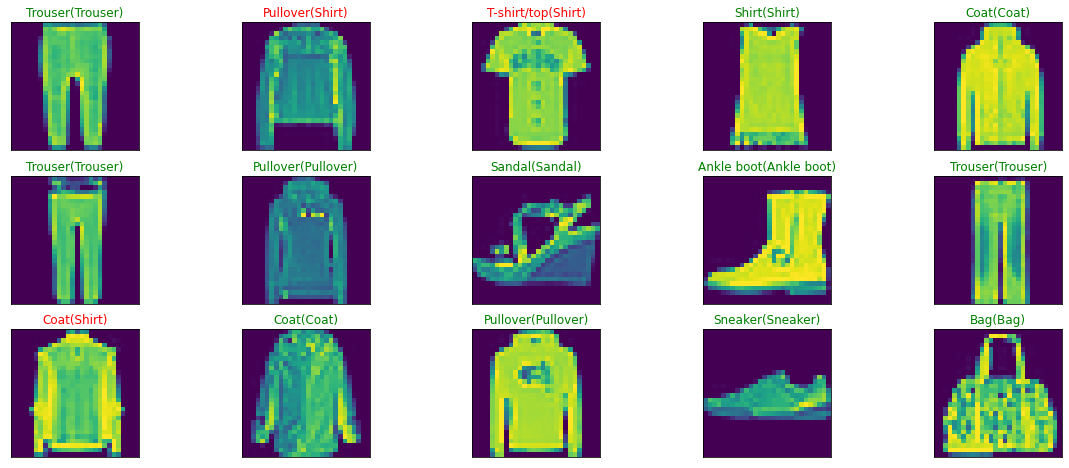

In [15]:
# Step 5 : Making Actual Predictions (Classification) on Real World Data
y_predicted = model.predict(test_images)

#Plot a random sample of 15 test images, their predicted labels and the ground truth (i.e. actual) label
figure = plt.figure(figsize=(20,8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size = 15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_predicted[index])
    #true_index = np.argmax(test_labels[index])
    true_index = test_labels[index]
    # Set the title for each image
    ax.set_title("{}({})".format(fashion_mnist_labels[predict_index],
                                 fashion_mnist_labels[true_index]), 
                                 color = "green" if predict_index == true_index else "red")